In [ ]:
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz -P /resources/data

In [ ]:
!tar -xf /resources/data/img.tar.gz

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from PIL import Image

In [ ]:
def show_data(data_sample, shape = (28,28)):
  plt.imshow(data_sample[0].numpy().reshape(shape) ,cmap='gray')
  plt.title(f'y = {data_sample[1]}')

In [ ]:
data_dir = '/content/img'
csv_dir = '/content/index.csv'
data_name = pd.read_csv(csv_dir)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [ ]:
print('number of data:', len(data_name))

number of data: 60000


In [ ]:
data_name.shape

(60000, 2)

#Load Image

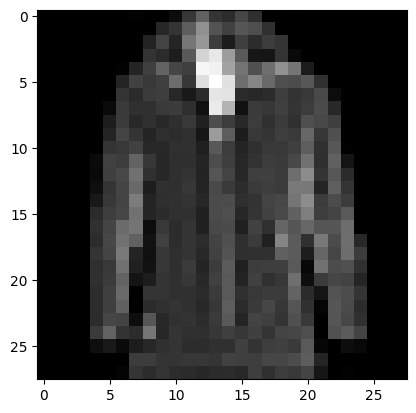

In [ ]:
img1 = Image.open('/content/img/fashion19.png')
plt.imshow(img1, cmap='gray')
plt.show()

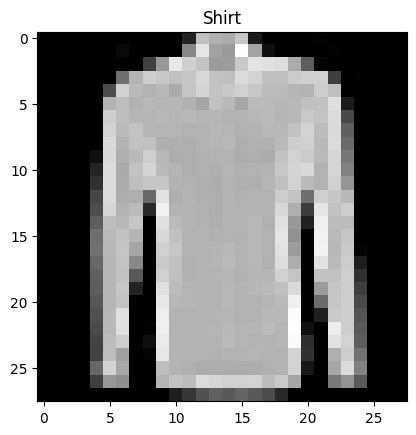

In [ ]:
num_img = 40
img2_name = data_name.iloc[num_img,1]
img2 = Image.open(f'/content/{img2_name}')
plt.imshow(img2, cmap='gray')
plt.title(data_name.iloc[num_img,0])
plt.show()

#Dataset Class

In [ ]:
class Dataset(Dataset):
  def __init__(self, csv_dir, data_dir, transform = None):
    self.data_dir = data_dir
    self.data_name = pd.read_csv(csv_dir)
    self.transform = transform
  def __len__(self):
    return self.len

  def __getitem__(self, idx):
    img_name = self.data_name.iloc[idx, 1]
    image = Image.open(f'/content/{img_name}')
    y = self.data_name.iloc[idx, 0]
    if self.transform:
      image = self.transform(image)
    return image, y


In [ ]:
dataset = Dataset(csv_dir=csv_dir, data_dir=data_dir)

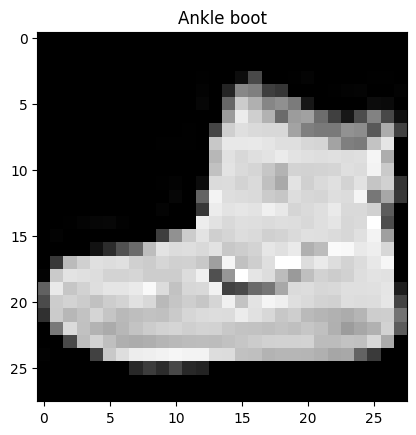

In [ ]:
image=dataset[0][0]
y=dataset[0][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

#Transforms

In [ ]:
from torchvision import transforms

In [ ]:
data_transform_crop = transforms.Compose([transforms.CenterCrop(28),
                                         transforms.ToTensor(),
                                         transforms.ConvertImageDtype(torch.float)])

In [ ]:
dataset = Dataset(csv_dir=csv_dir, data_dir=data_dir, transform=data_transform_crop)

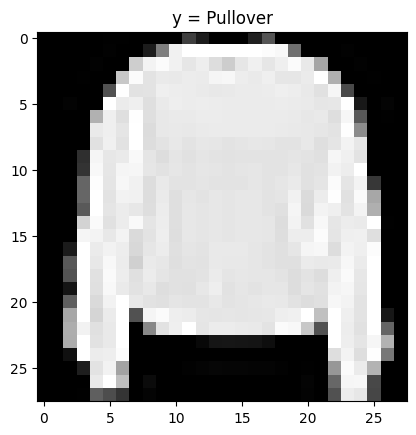

In [ ]:
show_data(dataset[7])